* 25 % carga y limpieza
    * Carga con Pandas: pd.read_csv

    * Limpieza de valores error: 
        * hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

    * Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16

    * Limpieza de nulos (limpiar valores NaN):
        * Nulos en columnas continuas: mediana, media
        * Nulos en columnas categóricas: moda, un valor fijo

    * Encoding: texto a numérico
        * Uso de la función get_dummies() para encoding one_hot
        * Uso de map para encoding ordinal para la columna cut: 1, 2, 3, 4

* 25 % transformaciones:
    * Uso de función apply:
        * crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%)

    * Crear una nueva columna volumen combinando: x * y * z

    * Ordenar por dos columnas con sort_values():
        * tipo de corte (cut) y precio (price)

    * Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

20 % distribuciones: 

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

* asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut

30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro


### Librerías a utilizar

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga y Limpieza
### Carga csv con pandas

In [2]:
df = pd.read_csv("diamonds.csv")
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


### Limpieza de valores error

In [4]:
df = df.replace('?', np.nan)

### Cambio de tipo de datos

In [5]:
df["carat"] = df["carat"].astype("float32")
df["price"] = df["price"].astype("float")
df["x"] = df["x"].astype("float32")
df["cut"] = df["cut"].astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float32 
 1   cut      53936 non-null  category
 2   color    53937 non-null  object  
 3   clarity  53938 non-null  object  
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  float64 
 7   x        53937 non-null  float32 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(1), float32(2), float64(5), object(2)
memory usage: 3.3+ MB


### Limpieza NaN

In [7]:
df.count()

carat      53939
cut        53936
color      53937
clarity    53938
depth      53940
table      53938
price      53937
x          53937
y          53939
z          53939
dtype: int64

In [8]:
df.isna().sum()

carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64

In [9]:
df["carat"] = df["carat"].fillna(df["carat"].mean())
df["cut"] = df["cut"].fillna(df["cut"].mode().iloc[0])
df["color"] = df["color"].fillna(df["color"].mode().iloc[0])
df["clarity"] = df["clarity"].fillna(df["clarity"].mode().iloc[0])
df["table"] = df["table"].fillna(df["table"].mean())
df["price"] = df["price"].fillna(df["price"].mean())
df["price"] = df["price"].astype("int32")
df["x"] = df["x"].fillna(df["x"].mean())
df["y"] = df["y"].fillna(df["y"].mean())
df["z"] = df["z"].fillna(df["z"].mean())

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float32 
 1   cut      53940 non-null  category
 2   color    53940 non-null  object  
 3   clarity  53940 non-null  object  
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int32   
 7   x        53940 non-null  float32 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(1), float32(2), float64(4), int32(1), object(2)
memory usage: 3.1+ MB


## Encoding

* Get_dummies()

In [51]:
df_encoded = pd.get_dummies(df)
df_encoded

,carat,depth,table,price,x,y,z,price_iva,volume,cut_5,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,394.46,38.202030,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,394.46,34.505857,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,395.67,38.076887,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,404.14,46.724578,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,405.35,51.917252,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,3335.97,115.920000,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,3335.97,118.110176,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,3335.97,114.449725,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,3335.97,140.766122,False,...,False,False,False,False,False,True,False,False,False,False


* Encodig Ordinal

In [12]:
df["cut"].value_counts()

cut
Ideal        21553
Premium      13791
Very Good    12080
Good          4906
Fair          1610
Name: count, dtype: int64

In [13]:
mapeo_cut = {
    "Ideal": 1,
    "Premium": 2,
    "Very Good": 3,
    "Good": 4,
    "Fair": 5
}

df["cut"] = df["cut"].map(mapeo_cut)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Creacion columnas

* price_iva

In [14]:
df["price_iva"] = df["price"] * 1.21
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43,394.46
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31,394.46
2,0.23,4,E,VS1,56.9,65.0,327,4.05,4.07,2.31,395.67
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63,404.14
4,0.31,4,J,SI2,63.3,58.0,335,4.34,4.35,2.75,405.35


* volumen ( x, y, z)

In [15]:
df["volume"] = df["x"] * df["y"] * df["z"]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,volume
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43,394.46,38.202030
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31,394.46,34.505857
2,0.23,4,E,VS1,56.9,65.0,327,4.05,4.07,2.31,395.67,38.076887
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63,404.14,46.724578
4,0.31,4,J,SI2,63.3,58.0,335,4.34,4.35,2.75,405.35,51.917252


### Orden de columnas


* Tipo de corte

In [16]:
df.sort_values("cut")


,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,volume
10501,1.00,5,F,SI1,65.4,59.0,4798,6.27,6.20,4.08,5805.58,158.605920
38840,0.73,5,I,I1,70.8,55.0,1049,5.51,5.34,3.84,1269.29,112.985861
5301,1.01,5,I,VS1,64.9,56.0,3801,6.29,6.20,4.07,4599.21,158.721859
1527,1.02,5,H,I1,61.5,60.0,2999,6.40,6.34,3.92,3628.79,159.057922
43373,0.71,5,J,SI2,65.5,61.0,1409,5.54,5.49,3.61,1704.89,109.796705
...,...,...,...,...,...,...,...,...,...,...,...,...
43613,0.31,3,E,SI1,63.0,58.0,507,4.29,4.31,2.71,613.47,50.107629
25808,2.01,3,J,VS1,61.2,60.0,14812,8.06,8.14,4.96,17922.52,325.417681
43616,0.34,3,G,SI1,61.5,56.0,507,4.45,4.52,2.76,613.47,55.514638
7034,0.90,3,I,VVS1,63.5,58.0,4161,6.06,6.09,3.86,5034.81,142.454843


* Precio

In [17]:
df.sort_values("price", ascending=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,volume
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43,394.46,38.202030
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31,394.46,34.505857
2,0.23,4,E,VS1,56.9,65.0,327,4.05,4.07,2.31,395.67,38.076887
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63,404.14,46.724578
4,0.31,4,J,SI2,63.3,58.0,335,4.34,4.35,2.75,405.35,51.917252


### Agrupaciones group_by() @@@@@@@@

* carac

In [65]:
df.groupby(by = "color").aggregate({"price":["min", "max", "mean"]})


price                    
        min    max         mean
color                          
D       357  18693  3170.275908
E       326  18731  3076.752475
F       342  18791  3723.447914
G       354  18818  4000.080220
H       337  18803  4486.891859
I       334  18823  5089.202361
J       335  18710  5323.818020

* price

In [19]:
df.groupby(by="cut", as_index = False).aggregate(["min", "max", "mean"])

In [66]:
df. groupby('cut')[['carat', 'depth', 'table', 'price']]. agg(['mean', 'min', 'max']) 

C:\Users\user\AppData\Local\Temp\ipykernel_15296\2899268578.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df. groupby('cut')[['carat', 'depth', 'table', 'price']]. agg(['mean', 'min', 'max'])


carat                  depth                  table              \
         mean   min   max       mean   min   max       mean   min   max   
cut                                                                       
5    1.046137  0.22  5.01  64.041677  43.0  79.0  59.053789  49.0  95.0   
4    0.849185  0.23  3.01  62.365879  54.3  67.0  58.694639  51.0  66.0   
1    0.702888  0.20  3.50  61.709446  43.0  66.7  55.951951  43.0  63.0   
2    0.891981  0.20  4.01  61.264673  58.0  63.0  58.745944  51.0  62.0   
3    0.806307  0.20  4.00  61.818212  56.8  64.9  57.955977  44.0  66.0   

           price              
            mean  min    max  
cut                           
5    4358.757764  337  18574  
4    3929.241337  327  18788  
1    3458.137893  326  18806  
2    4584.257704  326  18823  
3    3979.489570  336  18818

* depth

In [20]:
#df.groupby(by= "depth", as_index = False)

## Seaborn EDAS
### Univariantes

* Histograma y curva de densidad

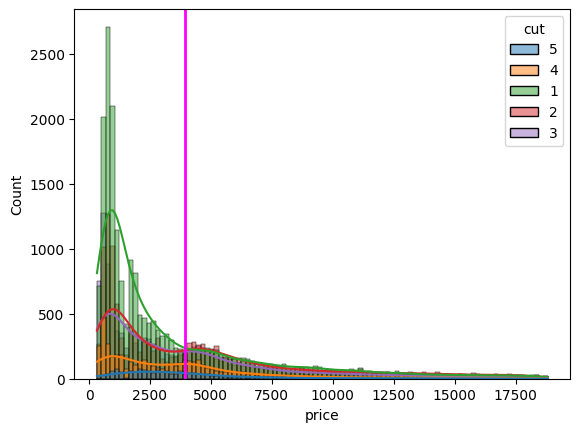

In [26]:
sns.histplot(df, x="price", kde=True, color="green", hue="cut", bins=100)
plt.axvline(df["price"].mean(), color="magenta", linewidth=2)

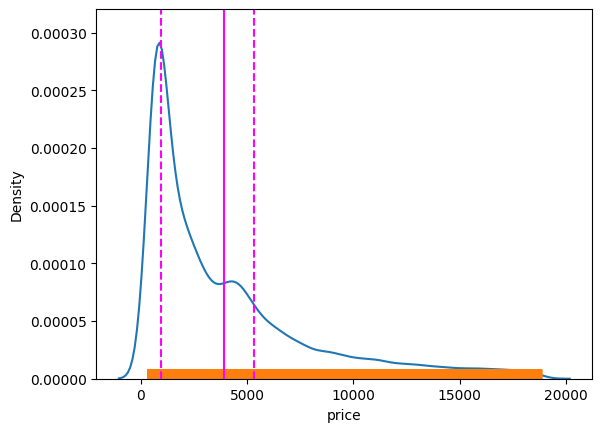

In [27]:
sns.kdeplot(df, x="price")
sns.rugplot(df, x="price")
plt.axvline(df["price"].mean(), color="magenta")
plt.axvline(df['price'].quantile(0.25), color='magenta', linestyle='--')
plt.axvline(df['price'].quantile(0.75), color='magenta', linestyle='--')

* Boxplot

<Axes: xlabel='price'>

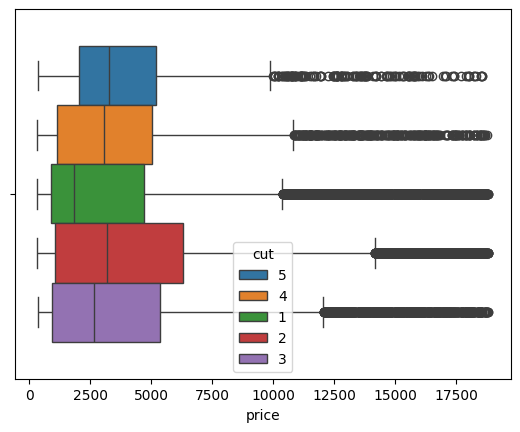

In [29]:
sns.boxplot(df, x=df["price"], hue=df["cut"])

* Countplot

<Axes: xlabel='price', ylabel='count'>

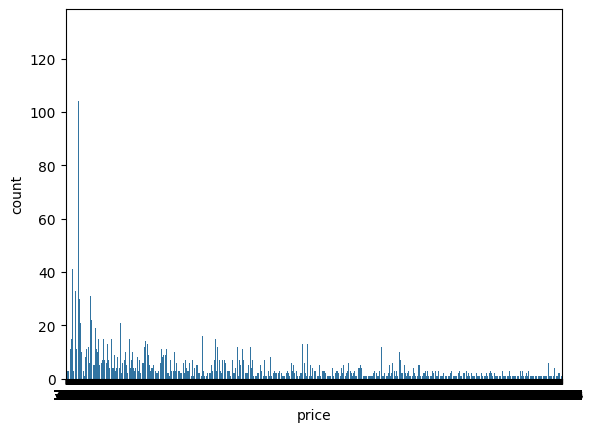

In [30]:
sns.countplot(df, x="price")

### Bivariantes y Multivariantes
* Scatterplot

<Axes: xlabel='price', ylabel='depth'>

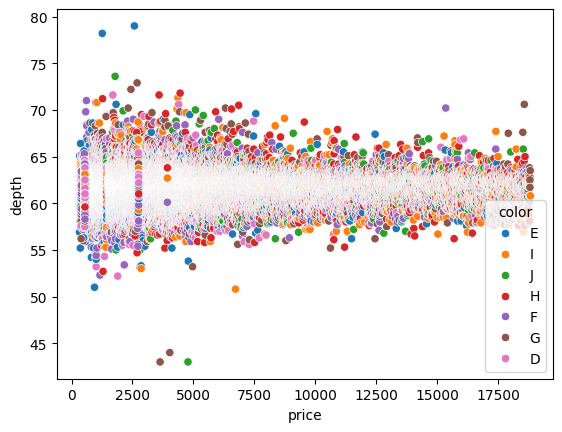

In [38]:
sns.scatterplot(df, x="price", y="depth", hue="color")


<Axes: xlabel='price', ylabel='depth'>

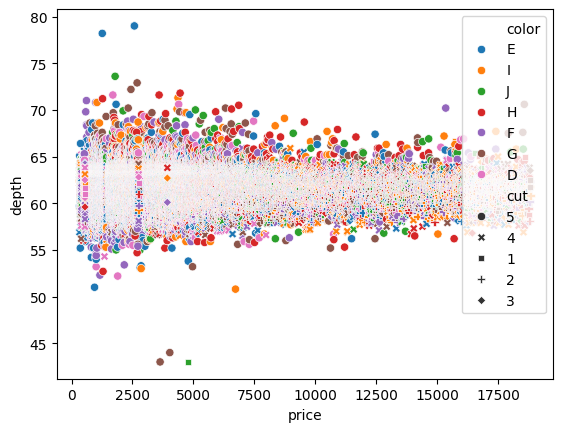

In [39]:
sns.scatterplot(df, x="price", y="depth", hue="color", style="cut")


<Axes: xlabel='volume', ylabel='price'>

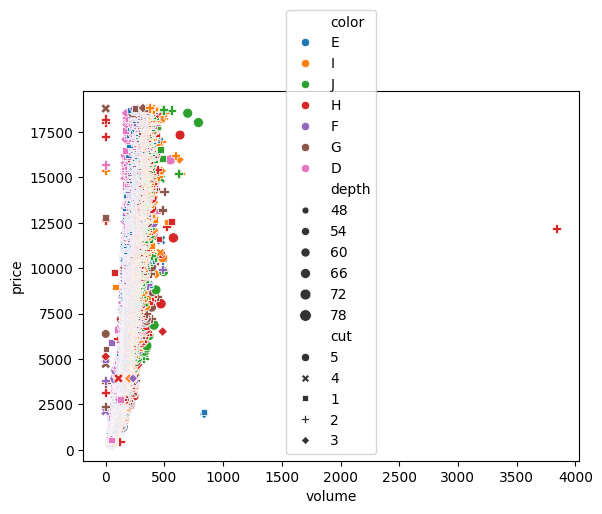

In [46]:
sns.scatterplot(df, x="volume", y="price", hue="color", style="cut", size="depth")

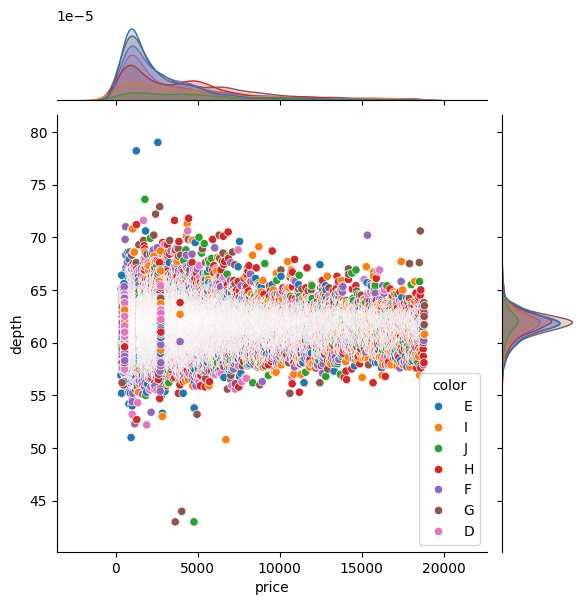

In [48]:
sns.jointplot(df, x="price", y="depth", hue="color")

#### Correlacion
* Calculo con pandas

In [53]:
correlacion = df_encoded.corr()
correlacion

,carat,depth,table,price,x,y,z,price_iva,volume,cut_5,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.028217,0.181610,0.921516,0.975084,0.951654,0.953373,0.921516,0.976285,0.091842,...,0.161305,0.180052,0.120982,-0.114452,0.062728,0.267478,-0.063125,-0.038933,-0.167576,-0.137029
depth,0.028217,1.000000,-0.295784,-0.010569,-0.025311,-0.029294,0.094947,-0.010569,0.009188,0.280657,...,0.022621,0.022543,0.081135,-0.030881,0.040985,0.007202,-0.024280,-0.009455,-0.023477,-0.019243
table,0.181610,-0.295784,1.000000,0.127074,0.195327,0.183699,0.150903,0.127074,0.167358,0.125335,...,0.017929,0.037257,0.044718,-0.078763,0.051958,0.095353,-0.026887,-0.009648,-0.069098,-0.062267
price,0.921516,-0.010569,0.127074,1.000000,0.884378,0.865406,0.861208,1.000000,0.902352,0.018742,...,0.096924,0.081735,-0.000248,-0.049590,0.008886,0.128464,-0.009885,-0.001049,-0.095260,-0.052366
x,0.975084,-0.025311,0.195327,0.884378,1.000000,0.974648,0.970750,0.884378,0.956551,0.080595,...,0.146388,0.164661,0.108363,-0.125975,0.079263,0.270834,-0.059900,-0.035549,-0.185251,-0.147125
y,0.951654,-0.029294,0.183699,0.865406,0.974648,1.000000,0.951956,0.865406,0.975122,0.068832,...,0.142780,0.160793,0.100745,-0.120798,0.076070,0.263283,-0.056500,-0.035936,-0.179268,-0.141617
z,0.953373,0.094947,0.150903,0.861208,0.970750,0.951956,1.000000,0.861208,0.950056,0.110371,...,0.145146,0.164222,0.111916,-0.125246,0.081066,0.263157,-0.058544,-0.036332,-0.182398,-0.144741
price_iva,0.921516,-0.010569,0.127074,1.000000,0.884378,0.865406,0.861208,1.000000,0.902352,0.018742,...,0.096924,0.081735,-0.000248,-0.049590,0.008886,0.128464,-0.009885,-0.001049,-0.095260,-0.052366
volume,0.976285,0.009188,0.167358,0.902352,0.956551,0.975122,0.950056,0.902352,1.000000,0.078680,...,0.157262,0.175617,0.112650,-0.110316,0.059514,0.261024,-0.059436,-0.038295,-0.162979,-0.132614
cut_5,0.091842,0.280657,0.125335,0.018742,0.080595,0.068832,0.110371,0.018742,0.078680,1.000000,...,0.004781,0.017257,0.175852,-0.027022,0.004571,0.055506,-0.022445,-0.027259,-0.039920,-0.030703


* Mostrar con Seaborn

<Axes: >

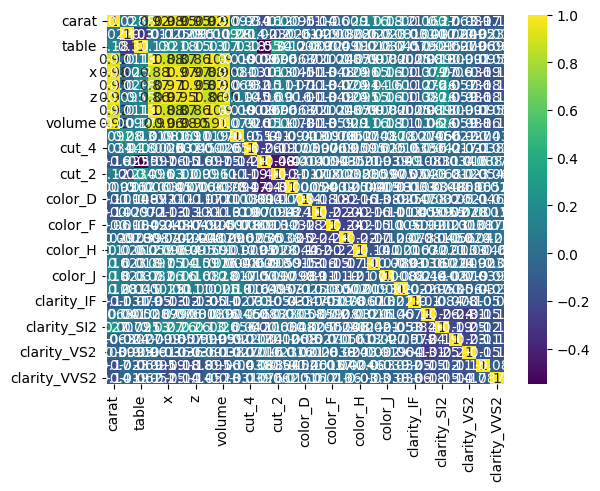

In [55]:
sns.heatmap(correlacion, annot=True, cmap="viridis")

<Axes: >

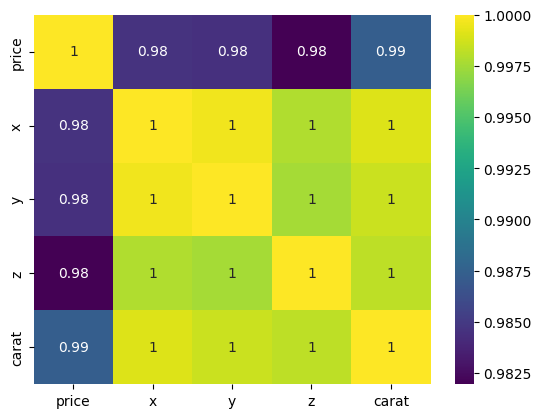

In [60]:
sns.heatmap(correlacion[["price", "x", "y", "z", "carat"]].corr(), annot=True, cmap="viridis") 

* Combinarlas con filtros hue, style

In [26]:
#

## Outliers
* Visualizacion Q1 y Q3 

In [27]:
#

* Limites Tukey y filtro

In [28]:
#

## Transformacion de datos
* Asimetria

* Curtosis

* Transformacion logaritmo

* Transformacion raiz cuadrada

## Discretizar la columna precio
* barato, medio, caro